In [125]:
import yfinance as yf
import datetime
# Define the list of ticker symbols for the top 100 large-cap stocks
tickers = [
    "^GSPC","AAPL", "MSFT", "AMZN", "GOOGL","JNJ", "JPM", "V", "PG", "UNH",
    "HD", "MA", "NVDA", "DIS", "PYPL",
    "BAC", "ADBE", "CMCSA", "XOM", "INTC",
    "T", "NFLX", "KO", "VZ", "NKE",
    "PFE", "MRK", "ABT", "TMO", "ACN"  ]
end = datetime.date.today()
start = end - datetime.timedelta(days = 1000)
data = yf.download(tickers,start,end,progress=False)['Close']
# Create a dictionary to store the data for each stock
data

,AAPL,ABT,ACN,ADBE,AMZN,BAC,CMCSA,DIS,GOOGL,HD,...,PFE,PG,PYPL,T,TMO,UNH,V,VZ,XOM,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-24,125.349998,122.379997,259.269989,476.619995,157.976501,36.380001,53.400002,197.509995,104.190498,259.970001,...,33.750000,127.660004,266.070007,22.190332,456.660004,332.209991,219.429993,57.119999,56.700001,3925.429932
2021-02-25,120.989998,121.580002,253.779999,459.160004,152.858002,35.930000,52.240002,190.979996,100.797501,255.250000,...,33.820000,126.580002,253.940002,21.623867,451.470001,328.869995,213.750000,56.500000,55.759998,3829.340088
2021-02-26,121.260002,119.779999,250.899994,459.670013,154.646500,34.709999,52.720001,189.039993,101.095497,258.339996,...,33.490002,123.529999,259.850006,21.064955,450.079987,332.220001,212.389999,55.299999,54.369999,3811.149902
2021-03-01,127.790001,122.209999,258.160004,469.570007,157.307007,35.790001,54.450001,194.979996,103.483002,261.619995,...,33.689999,124.290001,273.630005,21.216011,459.559998,334.649994,216.630005,55.360001,56.400002,3901.820068
2021-03-02,125.120003,122.529999,259.230011,466.589996,154.726501,35.529999,54.250000,193.940002,103.223999,260.290009,...,33.509998,123.900002,269.190002,21.314199,462.109985,334.640015,215.770004,54.980000,56.070000,3870.290039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14,187.440002,97.080002,320.489990,604.330017,145.800003,29.219999,41.869999,91.070000,133.619995,303.630005,...,29.260000,152.119995,56.680000,15.630000,459.260010,540.460022,246.940002,35.880001,104.290001,4495.700195
2023-11-15,188.009995,98.000000,325.500000,595.309998,143.199997,29.620001,42.529999,93.930000,134.619995,308.190002,...,30.190001,151.419998,58.250000,15.760000,470.540009,538.409973,248.110001,36.000000,103.660004,4502.879883
2023-11-16,189.710007,100.260002,327.320007,602.059998,142.830002,29.540001,42.410000,94.510002,136.929993,306.440002,...,29.770000,152.830002,56.820000,15.880000,472.470001,539.820007,248.570007,36.180000,102.459999,4508.240234


In [126]:
#1/N portfolio
import numpy as np
import pandas as pd
pct = data.drop(["^GSPC"],axis = 1).pct_change()
portfolio_r = []
pct.iloc[1] = (1+pct.iloc[1])*100 #initial investment
portfolio_r.append(pct.iloc[1].sum())
for i in range(2,pct.shape[0]):
  pct.iloc[i] = pct.iloc[i-1] * (1+pct.iloc[i])
  portfolio_r.append(pct.iloc[i].sum())

portfolio_r = np.insert(np.array(portfolio_r), 0, 100*pct.shape[1])
portfolio = pd.DataFrame(portfolio_r,index = data.index)

portfolio

,0
Date,
2021-02-24,2900.000000
2021-02-25,2837.817046
2021-02-26,2819.004015
2021-03-01,2878.031614
2021-03-02,2861.408978
...,...
2023-11-14,3215.429589
2023-11-15,3227.060182
2023-11-16,3247.369726


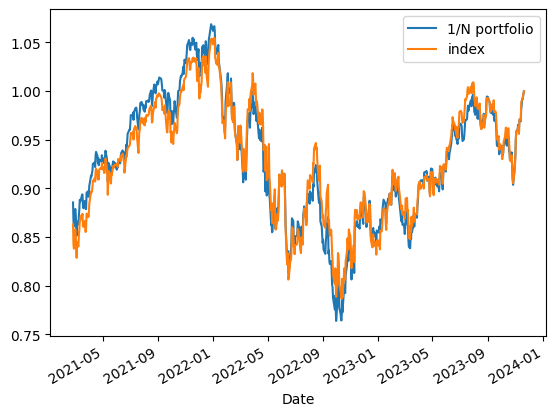

In [127]:
import matplotlib.pyplot as plt
index = data["^GSPC"]/data["^GSPC"][-1]
portfolio = portfolio[0]/portfolio[0][-1]
plt.plot(portfolio,label = '1/N portfolio')
index.plot(label = 'index')
plt.legend()
plt.show()